In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os

from scipy import stats
from scipy.stats import norm, ttest_ind, shapiro

In [5]:
path = "C:\\Users\\Quyntrd\\Desktop\\MatStat\\3"
os.chdir(path)

#os.getcwd()
#os.listdir(path)

CFD = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ROSSTAT')

CFD = CFD.iloc[90:101]
CFD = CFD.iloc[:, :13]
CFD = CFD.drop(CFD.columns[[1,2,3,4,5,6]], axis=1)
CFD.columns = ['Название области', '2005', '2010', '2015','2019', '2020', '2021' ]
CFD.set_index('Название области', inplace=True)

CFD = CFD.astype(float).copy()

print(CFD)

                               2005  2010  2015  2019  2020  2021
Название области                                                 
Республика Бурятия             38.6  41.3  45.6  45.1  44.7  43.4
Республика Саха (Якутия)       49.3  57.1  55.2  61.6  60.3  60.0
Забайкальский край             52.5  56.1  48.8  50.9  52.3  50.9
Камчатский край                53.2  49.3  53.6  52.9  52.5  54.9
Приморский край                53.5  52.7  50.0  51.8  51.1  50.8
Хабаровский край               60.5  61.1  53.5  56.4  57.5  56.4
Амурская область               60.7  62.8  55.4  54.9  55.4  56.8
Магаданская область            55.2  55.6  61.0  62.2  62.4  63.1
Сахалинская область            44.0  49.1  54.1  63.6  64.6  65.5
Еврейская автономная  область  37.0  35.4  37.9  38.0  37.6  35.2
Чукотский автономный округ     78.8  76.7  65.0  71.0  73.7  74.1


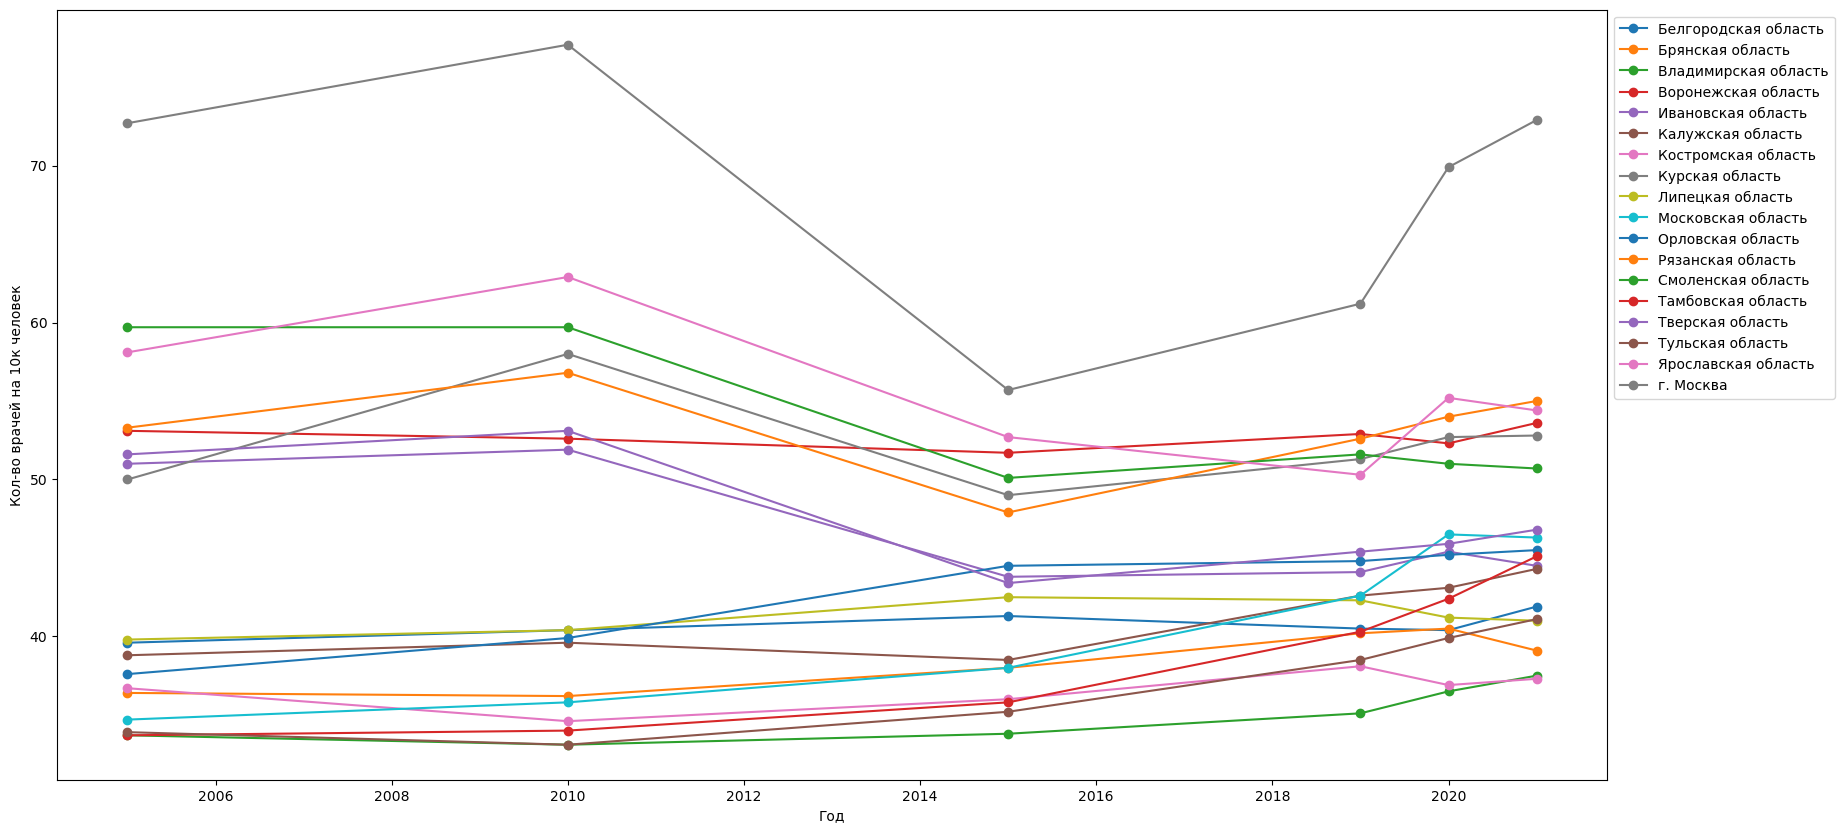

In [4]:
plt.figure(figsize=(20, 10))
years = [2005, 2010, 2015, 2019, 2020, 2021]
for i in range(len(CFD.index)):
    y = CFD.iloc[i]
    plt.plot(years, y, marker='o')
    plt.xlabel('Год')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(CFD.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

2. Визуализировать данные показателя X в каждый год периода T по указанному в
Вашем варианте Федеральному Округу с помощью графиков и боксплотов.

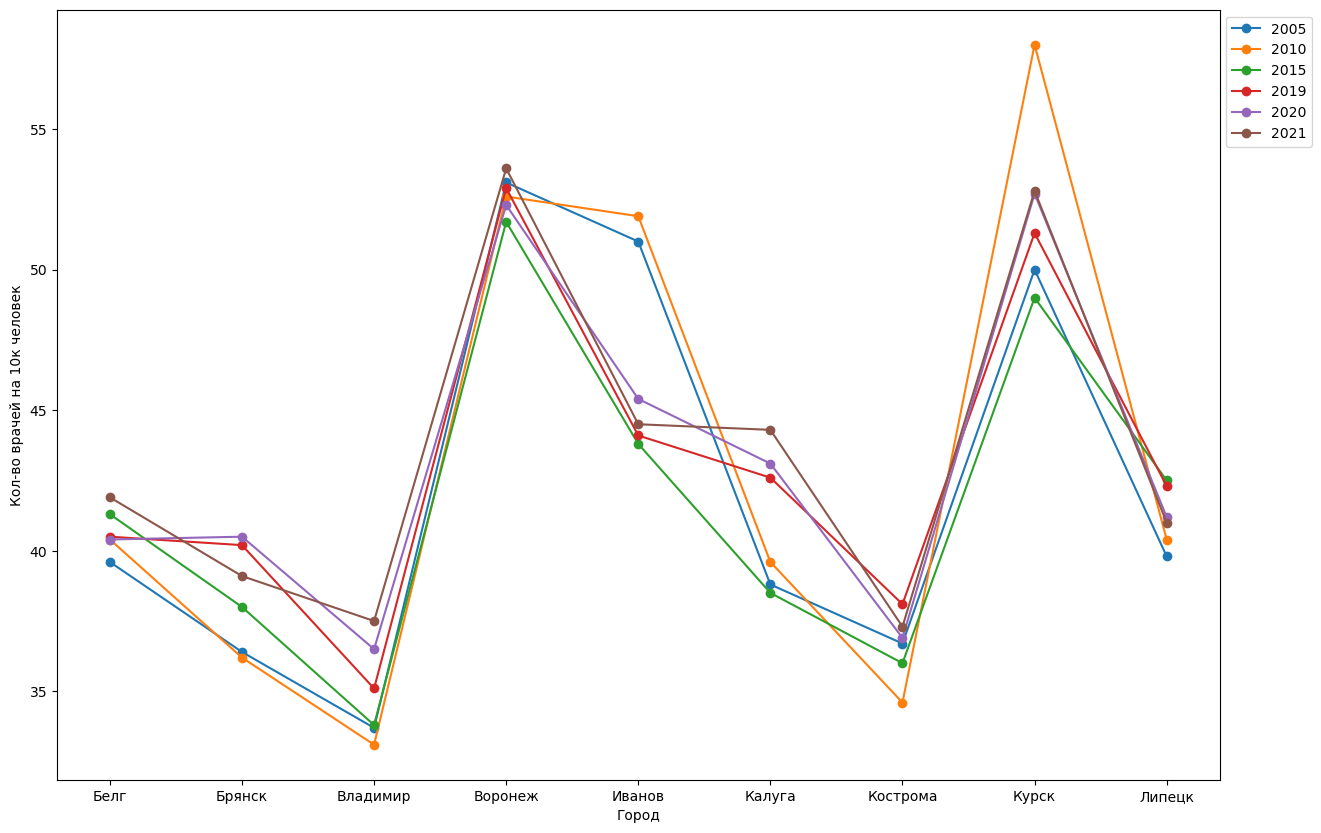

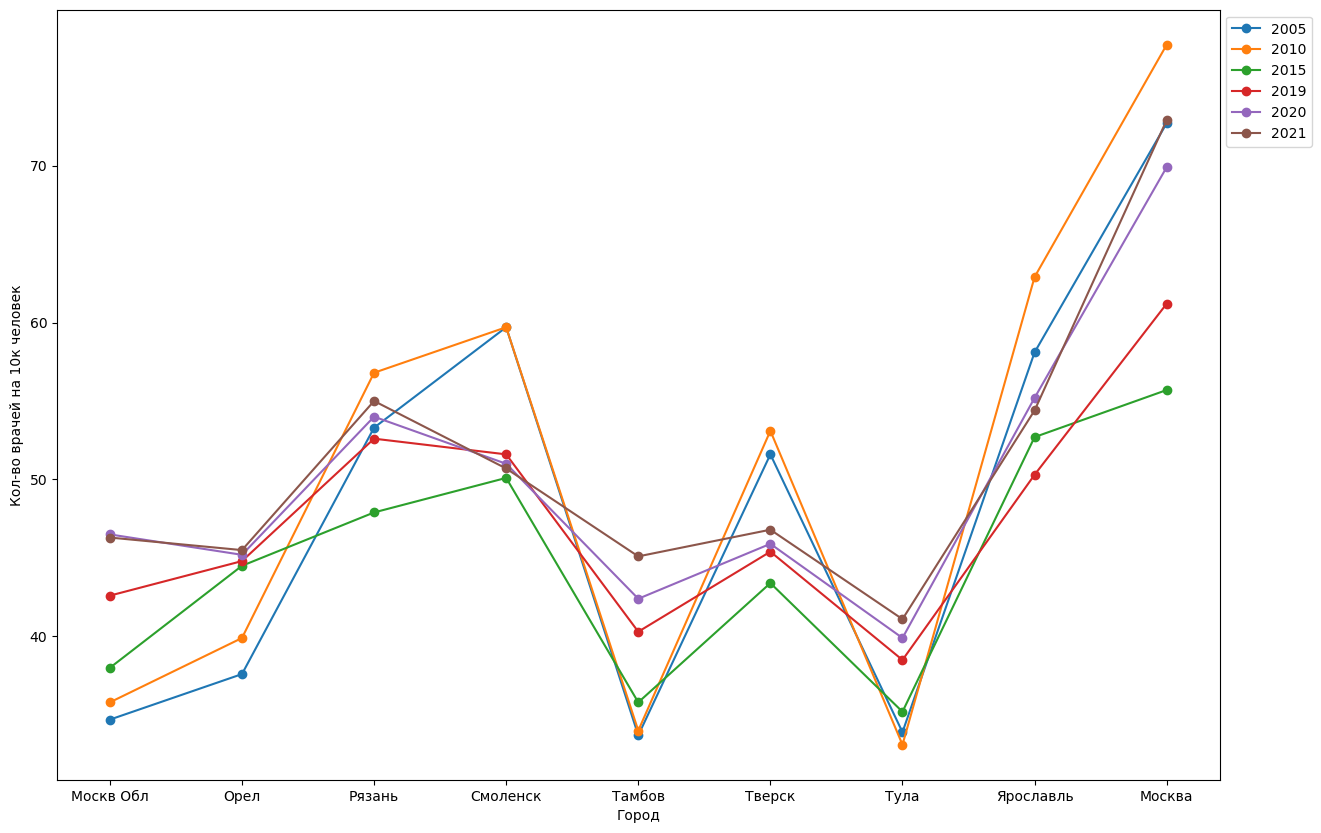

In [5]:
plt.figure(figsize=(15, 10))
cities = ["Белг", "Брянск", "Владимир", "Воронеж", "Иванов", "Калуга", "Кострома", "Курск", "Липецк"]
for i in range(len(CFD.columns)):
    y = CFD.iloc[:9, i]
    plt.plot(cities, y, marker='o')
    plt.xlabel('Город')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(CFD.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(15, 10))
cities = ["Москв Обл", "Орел", "Рязань", "Смоленск", "Тамбов", "Тверск", "Тула", "Ярославль", "Москва"]
for i in range(len(CFD.columns)):
    y = CFD.iloc[9:, i]
    plt.plot(cities, y, marker='o')
    plt.xlabel('Город')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(CFD.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

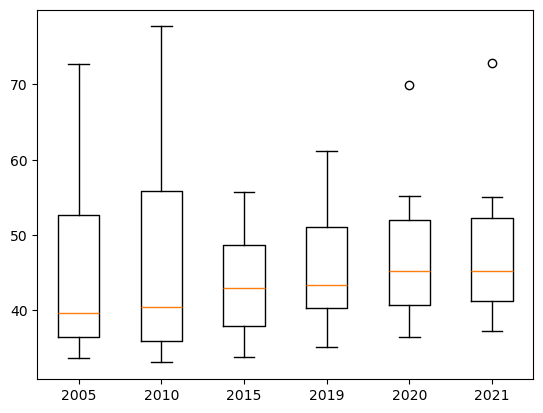

In [6]:
# Построение боксплота
data = [CFD.iloc[:, i].values for i in range(len(CFD.columns))]
plt.boxplot(data, tick_labels=CFD.columns)
plt.show()

3. Вычислить описательную статистику: среднее, стандартное отклонение, квартили,
минимальное и максимальное значения показателя X в каждый год периода T по
указанному в Вашем варианте Федеральному Округу.

In [7]:
for i in range(0, 6):
    print(CFD.iloc[:, i].describe(),"\n")

count    18.000000
mean     45.244444
std      11.297851
min      33.700000
25%      36.475000
50%      39.700000
75%      52.725000
max      72.700000
Name: 2005, dtype: float64 

count    18.000000
mean     46.655556
std      12.851240
min      33.100000
25%      35.900000
50%      40.400000
75%      55.875000
max      77.700000
Name: 2010, dtype: float64 

count    18.000000
mean     43.216667
std       6.701207
min      33.800000
25%      38.000000
50%      42.950000
75%      48.725000
max      55.700000
Name: 2015, dtype: float64 

count    18.000000
mean     45.244444
std       6.712344
min      35.100000
25%      40.350000
50%      43.350000
75%      51.050000
max      61.200000
Name: 2019, dtype: float64 

count    18.000000
mean     46.611111
std       8.189871
min      36.500000
25%      40.675000
50%      45.300000
75%      51.975000
max      69.900000
Name: 2020, dtype: float64 

count    18.000000
mean     47.211111
std       8.551428
min      37.300000
25%      41.300000


4. Проверить, можно ли считать, что распределение случайной величины X в указанном
Федеральном Округе в каждый год периода Т подчинено нормальному закону
распределения. Использовать для проверки тест Шапиро-Уилка (уровень значимости ALPHA указан в Вашем варианте)

In [8]:
ALPHA = 0.045  # Уровень значимости

normal_columns = list()
not_normal_columns = list()

for i in range(0, 6):
    # Проведение теста Шапиро-Уилка
    stat, p_value = stats.shapiro(CFD.iloc[:, i])

    # Вывод результатов
    print(f"Результаты теста Шапиро-Уилка - {i}:")
    print(f"Статистика теста: {stat:.4f}")
    print(f"P-значение: {p_value:.4f}")


    # Проверка гипотезы
    # H0: CFD - normal distribution
    # H1: CFD - NOT normal distribution
    if p_value > ALPHA:
        print(f"Гипотеза о нормальности НЕ отвергается на уровне значимости {ALPHA}.")
        print("Распределение можно считать нормальным.")
        normal_columns.append(i)
    else:
        print(f"Гипотеза о нормальности отвергается на уровне значимости {ALPHA}.")
        print("Распределение нельзя считать нормальным.")
        not_normal_columns.append(i)

    print("\n")
    
print(normal_columns)
print(not_normal_columns)


Результаты теста Шапиро-Уилка - 0:
Статистика теста: 0.8750
P-значение: 0.0215
Гипотеза о нормальности отвергается на уровне значимости 0.045.
Распределение нельзя считать нормальным.


Результаты теста Шапиро-Уилка - 1:
Статистика теста: 0.8843
P-значение: 0.0308
Гипотеза о нормальности отвергается на уровне значимости 0.045.
Распределение нельзя считать нормальным.


Результаты теста Шапиро-Уилка - 2:
Статистика теста: 0.9464
P-значение: 0.3720
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.045.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 3:
Статистика теста: 0.9368
P-значение: 0.2550
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.045.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 4:
Статистика теста: 0.8922
P-значение: 0.0420
Гипотеза о нормальности отвергается на уровне значимости 0.045.
Распределение нельзя считать нормальным.


Результаты теста Шапиро-Уилка - 5:
Статистика теста: 0.8632
P-знач

5. Выделить те года t1-tm с нормально распределенными значениями рядов данных Xt1-
Xtm, где Xt1- Xtm имеют одинаковую дисперсию (уровень значимости взять равным ALPHA).
Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и
Левена.

In [9]:
# H0: D(0) = D(1)
# H1: D(0) != D(1)
import itertools
columns = CFD.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = CFD[col1]
    group_2 = CFD[col2]
    
    bartlett_stat, bartlett_p_value = stats.bartlett(group_1, group_2)
    print(f'Бартлетт (столбцы {col1} и {col2}): stat = {bartlett_stat:.4f}, p-value = {bartlett_p_value:.4f}')
    if bartlett_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    levene_stat, levene_p_value = stats.levene(group_1, group_2)
    print(f'Левен (столбцы {col1} и {col2}): stat = {levene_stat:.4f}, p-value = {levene_p_value:.4f}')
    if levene_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    print('********************')

Бартлетт (столбцы 2015 и 2019): stat = 0.0000, p-value = 0.9946
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2015 и 2019): stat = 0.0556, p-value = 0.8150
	Гипотеза H0 о равенстве дисперсий принимается.

********************


6. Проверить, можно ли считать, что среднее значение показателя X по данному
Федеральному Округу в каждый год периода t1-tm значимо выше (ниже)
общероссийского значения показателя X (уровень значимости взять равным ALPHA).
Общероссийские значения показателя X найти в файле CHISLO_DOCTORS.xlsx.
Использовать для проверки гипотезы о равенстве средних t-тест для одной выборки

In [10]:
df = pd.read_excel("CHISLO_DOCTORS.xlsx",sheet_name='ROSSTAT')

df_RU = df.iloc[[3], 7:13]
df_RU.columns = ['2005', '2010','2015','2019', '2020', '2021' ]
df_RU.insert(0, 'Название', ['РФ'])
df_RU.set_index("Название", inplace=True)

print(df_RU)

          2005  2010  2015  2019  2020  2021
Название                                    
РФ        48.6  50.1  45.9  48.7  50.4  51.0


In [11]:
for i in normal_columns:
    sample = CFD.iloc[:, i]
    sample_mean = sample.mean()
    ru_mean = df_RU.iloc[0, i]
    if sample_mean < ru_mean: 
        # H0 : sample = ru_mean
        # H1 : sample < ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="less")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически меньше среднего по РФ")
        else:
            print("Нет статистически значимого различия (меньше)\n")
    else:
        # H0 : sample = ru_mean
        # H1 : sample > ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="greater")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически больше среднего по РФ")
        else:
            print("Нет статистически значимого различия (больше)\n")
            

0.05378518805264744
Нет статистически значимого различия (меньше)

0.02162594873120219
Среднее значение выборки статистически меньше среднего по РФ


7. Проверить, можно ли считать, что различия между средними значениями показателя
X по данному Федеральному Округу в какие-то два года из периода t1-tm незначимы,
появились случайно (уровень значимости взять равным ALPHA). Использовать для проверки
гипотезы о равенстве средних t-тест для двух выборок.

In [13]:
import itertools
columns = CFD.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = CFD[col1].to_list()
    group_2 = CFD[col2].to_list()

    mean_1 = CFD[col1].mean()
    mean_2 = CFD[col2].mean()

    if mean_1 < mean_2: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='less')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически меньше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (меньше)")
    else: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='greater')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически больше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (больше)")
    print(f"P_value:{p_value}")
    print("************************")

Нет статистически значимого различия между средними 2015 и 2019 (меньше)
P_value:0.18538412003969384
************************


8. Проверить значимость отличий средних в выбранной группе (уровень значимости
взять равным ALPHA). Использовать для проверки гипотезы о равенстве средних групп тест
Тьюки и односторонний тест ANOVA

In [ ]:
data = []
for column in CFD.columns[normal_columns]:
    data.append(CFD[column])

# print(data)
result = stats.tukey_hsd(*data)
print(result.pvalue)
print(result)

[[1.         0.37076824]
 [0.37076824 1.        ]]
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.028     0.371    -6.571     2.515
 (1 - 0)      2.028     0.371    -2.515     6.571



In [29]:
data = []
for column in CFD.columns[normal_columns]:
    data.append(CFD[column])

statistic, p_value = stats.f_oneway(*data)
print(statistic, p_value)
if p_value < ALPHA:
    print(f"Существенные статистические различия между средними выборок")
else:
    print(f"Нет статистически значимого различия между средними выборок")

0.822726366221803 0.3707682400793887
Нет статистически значимого различия между средними выборок
